In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import tensorflow as tf

# Descargue manualmente el modelo y colóquelo en el directorio C: \ Users \ nombre de usuario \ .keras \ models, la dirección de descarga es la siguiente:
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

# Cargar modelo e imprimir
model = VGG16()
print(model.summary())


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 817s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


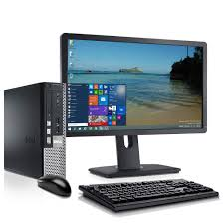

In [16]:
# Cargar una imagen de prueba
# tigre.jpg, tigre.jpg, gato03.jpg, violin.png, panda.png, leon.png
#image = load_img("leon.png", target_size=(224, 224))
image = load_img("pcescritorio.jpg", target_size=(224, 224))

image

In [17]:
  # Convertir a matriz
image = img_to_array(image)
print("Imagen convertida en matriz --> ", image.shape)

  # Reformar en 4D
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print("Imagen en 4D --> ", image.shape)

  # Imagen de preproceso   
image = preprocess_input(image)
print("Resultado del preprocesamiento --> ", image.shape)

  # Pronóstico
predict_result = model.predict(image)

  # Resultados de predicción de análisis
label = decode_predictions(predict_result)
label

Imagen convertida en matriz -->  (224, 224, 3)
Imagen en 4D -->  (1, 224, 224, 3)
Resultado del preprocesamiento -->  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[[('n03180011', 'desktop_computer', 0.9516401),
  ('n03782006', 'monitor', 0.0228686),
  ('n04152593', 'screen', 0.012597987),
  ('n03085013', 'computer_keyboard', 0.004424073),
  ('n03793489', 'mouse', 0.0030869516)]]

In [22]:
  # Imprima las tres categorías con mayor probabilidad
for idx in range(0, 3):
    categoria = label[0][idx][1]
    prob = label[0][idx][2]
    print("|{:<15}|{:>10.6f}|".format(categoria, prob))

# Limpiar
#tf.keras.backend.clear_session()


# ""

|desktop_computer|  0.951640|
|monitor        |  0.022869|
|screen         |  0.012598|


In [21]:
label[0][0][1]

'desktop_computer'